In [1]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [2]:
df = pd.read_csv(r'CAR DETAILS.csv')

#### Shape

In [3]:
df.shape

(4340, 8)

#### Handling Null values

In [4]:
print(df.duplicated().sum())

763


# dropping all the duplicate value

In [5]:
df.drop_duplicates(keep='first')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


####  Checking the datatypes

In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

# checking all columns name

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# making new data set to find the age of the cars

In [8]:
final_dataset=df[['name','year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]

 # creating a column current year

In [9]:
final_dataset['current_year']=2023

# finding the how many years is passed after purchasing the car

In [10]:
final_dataset['no_year']=final_dataset['current_year']-final_dataset['year']

# droping both year and current_year 

In [11]:
final_dataset.drop(['year'],axis=1,inplace=True)
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [12]:
final_dataset

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,9
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,9
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,9
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,14
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,7


#### Handling Outliers

In [13]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,90%,95%,96%,97%,98%,99%,max
year,4340.0,2013.090783,4.215344,1992.0,2001.00,2003.0,2004.0,2005.0,2014.0,2018.0,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,55000.00,65000.0,70000.0,80000.0,350000.0,900000.0,1300000.0,1479400.0,1720750.0,2492200.0,3200000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,1444.68,5000.0,6483.4,10000.0,60000.0,120000.0,140000.0,150000.0,163830.0,186000.0,220000.0,806599.0


#### Boxplots for Outliers

In [14]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='km_driven', points='outliers')
fig.update_layout(
    title=' box plot of year column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [15]:
print(final_dataset[final_dataset['km_driven']>200000].shape)
print(final_dataset[final_dataset['km_driven']>200000].shape[0]/final_dataset.shape[0])

(57, 8)
0.013133640552995391


In [16]:

# Filtered km_driven
final_dataset = final_dataset[final_dataset['km_driven'] < 200000]

In [17]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='km_driven', points='outliers')
fig.update_layout(
    title=' box plot of year column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [18]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='selling_price', points='outliers')
fig.update_layout(
    title='box plot of selling_price column', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [19]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='km_driven', points='outliers')
fig.update_layout(
    title='km_driven  box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [20]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='fuel', points='outliers')
fig.update_layout(
    title='fuel box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [21]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='seller_type', points='outliers')
fig.update_layout(
    title='seller_type  box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [22]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = final_dataset.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.box(df_filtered, x='owner', points='outliers')
fig.update_layout(
    title='owner  box plot', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.show()

# EDA

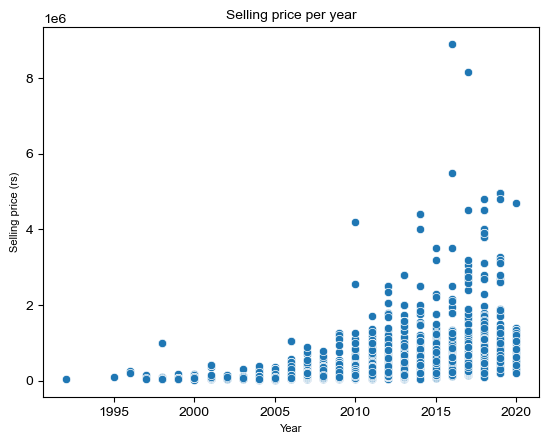

In [23]:

sns.scatterplot(data=df, x="year", y="selling_price")
sns.set_style('darkgrid')
plt.title("Selling price per year", size=10)
plt.ylabel("Selling price (rs)", size=8)
plt.xlabel("Year", size=8)
plt.show()

In [24]:
import plotly.express as px

CAR_DETAILS = df.sort_values(by='selling_price', ascending=False, na_position='last')
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='name', y='year', color='selling_price')
fig.update_layout(
    title='Seeing  the top selling car name by year', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [25]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='owner', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by owners ', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [26]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(50)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='fuel', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by fuel type', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [27]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(100)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='seller_type', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by seller type', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [28]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(50)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='name', y='selling_price', color='transmission', histfunc='count')
fig.update_layout(
    title='Seeing which car got more selling price by transmission ', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [29]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='name')
fig.update_layout(
    title='Seeing which car is mostly bought by people', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [30]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, y='year', histfunc='count')
fig.update_layout(
    title='Seeing which year has more cars', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [31]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, y='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing average how much people ride their car', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [32]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='transmission')
fig.update_layout(
    title="Seeing what kind of transmission people's prefer to ride", 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [33]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='seller_type')
fig.update_layout(
    title="Seeing how people's prefer selling their car solo or though agent ", 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [34]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(CAR_DETAILS_filtered, x='owner')
fig.update_layout(
    title='Seeing how many people prefer buying new or used car', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [35]:

# Filtered owner
CAR_DETAILS = df[CAR_DETAILS['owner'] == 'Second Owner']

# Sorted owner in ascending order
CAR_DETAILS = df.sort_values(by='owner', ascending=True, na_position='first')


C:\Users\yokau\AppData\Local\Temp\ipykernel_15628\3881519775.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [36]:

# Filtered owner
CAR_DETAILS = df[CAR_DETAILS['owner'] == 'Second Owner']

# Sorted owner in ascending order
CAR_DETAILS = df.sort_values(by='owner', ascending=True, na_position='first')




import plotly.express as px

# Filter the dataframe so that it does not crash the browser
CAR_DETAILS_filtered = CAR_DETAILS.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS_filtered, x='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing when people willing to buy second hand cars by km driven', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

C:\Users\yokau\AppData\Local\Temp\ipykernel_15628\3412240098.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [37]:

CAR_DETAILS1 = df[CAR_DETAILS['owner'] == 'Third Owner']



import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(CAR_DETAILS1, x='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing till how much km driven car 3rd owner  people can buy', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

C:\Users\yokau\AppData\Local\Temp\ipykernel_15628\827545140.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [38]:
car= df.sort_values(by='km_driven', ascending=False, na_position='last')



import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = car.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(df_filtered, y='km_driven', histfunc='count')
fig.update_layout(
    title='Seeing till how much max km driven car people can buy', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show()

In [39]:
final_dataset.dtypes

name             object
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
no_year           int64
dtype: object

# copying final_dataset for one hot encoding

In [40]:
df1=final_dataset.copy()

In [41]:
df1.dtypes

name             object
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
no_year           int64
dtype: object

# dropping name 

In [42]:
df1.drop(['name'],axis=1,inplace=True)

In [46]:
print(df1['fuel'].unique())
print(df1['seller_type'].unique())
print(df1['transmission'].unique())
print(df1['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


# handling category features

In [47]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Converting type of columns to category
#df1['name']=df1['name'].astype('category')
df1['fuel']=df1['fuel'].astype('category')
df1['seller_type']=df1['seller_type'].astype('category')
df1['transmission']=df1['transmission'].astype('category')
df1['owner']=df1['owner'].astype('category')


#Assigning numerical values and storing it in another columns
#df1['name']=df1['name'].cat.codes
df1['fuel']=df1['fuel'].cat.codes
df1['seller_type']=df1['seller_type'].cat.codes
df1['transmission']=df1['transmission'].cat.codes
df1['owner']=df1['owner'].cat.codes
#Create an instance of One-hot-encoder
enc=OneHotEncoder()

#Passing encoded columns
'''
NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we
have huge number of categorical variables
'''
enc_data=pd.DataFrame(enc.fit_transform(df1[['km_driven','fuel','seller_type','transmission','owner']]).toarray())

#Merge with main
new_df=df1.join(enc_data)

print(new_df)


      selling_price  km_driven  fuel  seller_type  transmission  owner  \
0             60000      70000     4            1             1      0   
1            135000      50000     4            1             1      0   
2            600000     100000     1            1             1      0   
3            250000      46000     4            1             1      0   
4            450000     141000     1            1             1      2   
...             ...        ...   ...          ...           ...    ...   
4335         409999      80000     1            1             1      2   
4336         409999      80000     1            1             1      2   
4337         110000      83000     4            1             1      2   
4338         865000      90000     1            1             1      0   
4339         225000      40000     4            1             1      0   

      no_year    0    1    2  ...  738  739  740  741  742  743  744  745  \
0          16  0.0  0.0  0.0  ... 

In [48]:
df1.dtypes

selling_price    int64
km_driven        int64
fuel              int8
seller_type       int8
transmission      int8
owner             int8
no_year          int64
dtype: object

In [49]:
new_df.dtypes

selling_price      int64
km_driven          int64
fuel                int8
seller_type         int8
transmission        int8
                  ...   
743              float64
744              float64
745              float64
746              float64
747              float64
Length: 755, dtype: object

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [51]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [54]:
x = df1.drop('selling_price',axis=1)
y = df1['selling_price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4267, 6)
(4267,)


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 6)
(1067, 6)
(3200,)
(1067,)


#### 1) Linear Regression

In [56]:

step2 = LinearRegression()

pipe_lr = Pipeline([('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 228807.1433194806
MSE 166112623307.52567
RMSE 407569.1638329937
R2_Score 0.48356067516968837


#### 2) Ridge Regression

In [57]:
step2 = Ridge(alpha=10)

pipe_ridge = Pipeline([('step2',step2)])

pipe_ridge.fit(x_train,y_train)

ypred_ridge = pipe_ridge.predict(x_test)

eval_model(y_test,ypred_ridge)

MAE 228280.97004723892
MSE 166171383924.40308
RMSE 407641.2441404857
R2_Score 0.4833779901172067


#### 3) Lasso Regression

In [58]:
step2 = Lasso(alpha=0.1)

pipe_lasso = Pipeline([('step2',step2)])

pipe_lasso.fit(x_train,y_train)

ypred_lasso = pipe_lasso.predict(x_test)

eval_model(y_test,ypred_lasso)

MAE 228807.09654576247
MSE 166112620240.46103
RMSE 407569.1600703628
R2_Score 0.48356068470510327


#### 4) KNN Regression

In [59]:
step2 = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline([('step2',step2)])

pipe_knn.fit(x_train,y_train)

ypred_knn = pipe_knn.predict(x_test)

eval_model(y_test,ypred_knn)

MAE 230158.7297719463
MSE 212352945825.54306
RMSE 460817.69261340547
R2_Score 0.33980085447905406


#### 5) DT Regression

In [60]:
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=15)

pipe_dt = Pipeline([('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 183911.24079205107
MSE 157884868345.86884
RMSE 397347.2893400291
R2_Score 0.509140526554016


#### 6) RF Regression

In [61]:
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,
                              min_samples_split=2,random_state=5)

pipe_rf = Pipeline([('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

MAE 173363.0182666166
MSE 133711495095.44705
RMSE 365665.8243471039
R2_Score 0.5842948424136063


#### Inference


#### Saving the model and the DataFrame

In [62]:
import pickle

In [63]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,4,1,1,0,16
1,135000,50000,4,1,1,0,16
2,600000,100000,1,1,1,0,11
3,250000,46000,4,1,1,0,6
4,450000,141000,1,1,1,2,9


In [64]:
pickle.dump(pipe_rf,open('RF_Regression.pkl','wb')) # saving the best performing model
pickle.dump(df1,open('df1.pkl','wb'))  # saving the dataframe

In [66]:
print(df1['fuel'].unique())
print(df1['seller_type'].unique())
print(df1['transmission'].unique())
print(df1['owner'].unique())

[4 1 0 3 2]
[1 0 2]
[1 0]
[0 2 1 4 3]


In [ ]:
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']